## Group plots

Created: 10/24/2017 (cloned from part2_analysis_wasp21)

Last edit: 10/24

$$
F_{rel} = \Big(k_0+\sum_{i=1}k_iX_i\Big) \times F_{tr} \\
F_{tr}(\mu) = I(1)[1-u_1(1-\mu)-u_2(1-\mu)^2]
$$

$$
slope_{\rm{observed}} - slope_{\rm{theory}} < 1\sigma?
$$

In [1]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda35'

## Introduction: M-R relation

In [3]:
# Python 2 and 3 compatible
try:
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
except ImportError:
    from urllib2 import urlopen, Request, HTTPError
import time
import warnings
warnings.filterwarnings('ignore')

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
pl_params = "pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_radj,pl_radjerr1,pl_radjerr2,pl_dens,pl_instrument,pl_insol,pl_eqt,"
pl_err = 'pl_bmassjerr1,pl_bmassjerr2,pl_bmassjerr1,pl_bmassjerr2,pl_orbpererr1,pl_orbpererr2,'
st_params = "st_optmag,ra,dec,st_dist,st_teff,st_mass,st_rad,st_plx,gaia_plx,gaia_dist,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_acts,st_bmvj,st_jmh2,"
others = 'pl_instrument,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink'
full_url= url+'&select='+ pl_params + pl_err + st_params+others

response = urlopen(full_url)
html = response.read()

import getpass
uname=getpass.getuser()

outdir = 'home/'+uname+'/data/transit/nexsci'
fname = 'confirmed_planets_extended_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download
outpath =os.path.join(outdir,fname)

print("Downloading data from URL:\n{}".format(url))

if not os.path.exists(fname):
    with open(fname,'wb') as f:
         f.write(html)
    print("Saved file as {}".format(fname))
else:
    print("Reading {}".format(outpath))
    
import pandas as pd

df = pd.read_csv(fname)
df.head(3)

http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets
Saved file as confirmed_planets_extended_20171114.csv


,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_acts,st_bmvj,st_jmh2,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink
0,Kepler-571,b,Transit,2016,1,4.798599,NaN,NaN,NaN,NaN,...,NaN,NaN,0.364,Kepler CCD Array,0.95 m Kepler Telescope,2016-05-10,0,Morton et al. 2016,Morton et al. 2016,http://exoplanet.eu/catalog/kepler-571_b/
1,Kepler-494,b,Transit,2016,1,8.025118,NaN,NaN,NaN,NaN,...,NaN,NaN,0.359,Kepler CCD Array,0.95 m Kepler Telescope,2016-05-10,0,Morton et al. 2016,Morton et al. 2016,http://exoplanet.eu/catalog/kepler-494_b/
2,Kepler-496,b,Transit,2016,1,8.308649,NaN,NaN,NaN,NaN,...,NaN,NaN,0.418,Kepler CCD Array,0.95 m Kepler Telescope,2016-05-10,0,Morton et al. 2016,Morton et al. 2016,http://exoplanet.eu/catalog/kepler-496_b/


In [4]:
hatp44b = df.query('pl_hostname == "HAT-P-44" and pl_letter == "b"')
hatp12b = df.query('pl_hostname == "HAT-P-12" and pl_letter == "b"')
corot5b = df.query('pl_hostname == "CoRoT-5" and pl_letter == "b"')
wasp21b = df.query('pl_hostname == "WASP-21" and pl_letter == "b"')

In [5]:
pl.legend?

Object `pl.legend` not found.


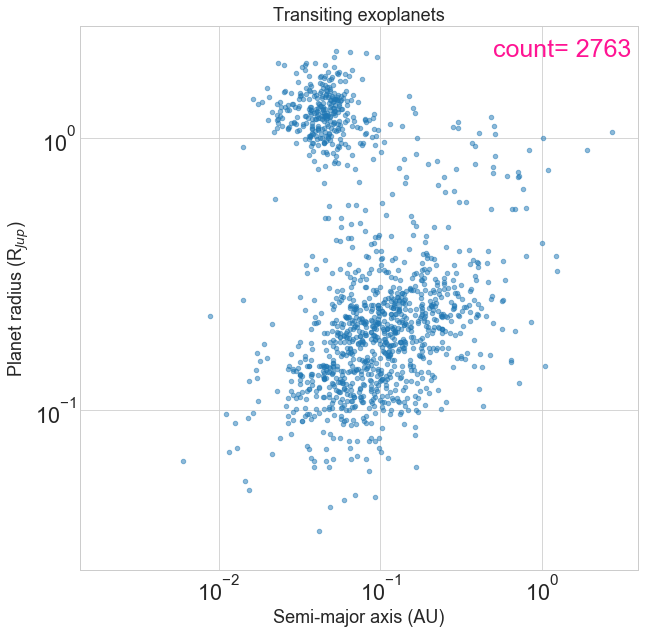

In [35]:
import matplotlib.pyplot as pl
%matplotlib inline
pl.style.use('seaborn-whitegrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize=18


plot_targets=False
show_count  =True

fig,ax=pl.subplots(1,1,figsize=(10,10))

transiting = df[df['pl_discmethod'] == 'Transit']

transiting.plot(x='pl_orbsmax',y='pl_radj', 
                kind='scatter',ax=ax, marker='o', 
                alpha=0.5)

if plot_targets:
    for d in [hatp44b,hatp12b,corot5b,wasp21b]: 
        ax.plot(d['pl_orbsmax'],d['pl_radj'], 'o', ms=10, label=str(d))

    labels='HAT-P-44b,HAT-P-12b,CoRoT-5b,WASP-21b'.split(',')
    pl.legend(labels,loc='best',fontsize=fontsize)

if show_count:
    count = len(transiting)
    text  = 'count= {}'.format(count)
    pl.text(0.5,2,text,color='deeppink', fontsize=25)
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)',fontsize=fontsize)
ax.set_ylabel('Planet radius (R$_{Jup}$)',fontsize=fontsize)
ax.set_title('Transiting exoplanets',fontsize=fontsize)
#ax.set_gid(True)

In [7]:
len(transiting)

2763

## Density

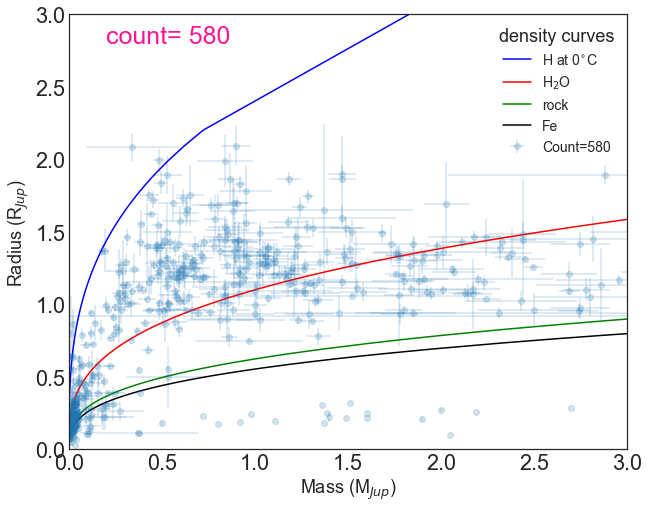

In [28]:
import numpy as np

plot_targets=False
show_count  =True


mass_h2O, mass_Fe, mass_rock, mass_H = [],[],[],[]#,[], []

rho_h2O, rho_Fe, rho_rock, rho_H= 1000, 7874, 5510, 89.88#, 11340, 21450 #kg/m3
Mjup,Rjup=1.898e27,6.9911e7

rad = df['pl_radj'].sort_values()
for r in rad*Rjup:
    mass_h2O.append(4./3.*np.pi*rho_h2O*(r)**3) #kg
    mass_Fe.append(4./3.*np.pi*rho_Fe*(r)**3) #kg
    mass_rock.append(4./3.*np.pi*rho_rock*(r)**3) #kg
    mass_H.append(4./3.*np.pi*rho_H*(r)**3) #kg
    #mass_lead.append(4./3.*np.pi*rho_lead*(r)**3) #kg
    #mass_iridium.append(4./3.*np.pi*rho_iridium*(r)**3) #kg

count=len(df.query('pl_radj > 0 and pl_bmassj > 0'))

fig, ax1 = pl.subplots(1,1,figsize=(10,8))
errbar = ax1.errorbar(x=df['pl_bmassj'], y=df['pl_radj'], 
             xerr=df['pl_bmassjerr1'], yerr=df['pl_radjerr1'],
             fmt='o', alpha=0.2, label='Count={}'.format(count))
#plt.xlim([0,13])
#plt.ylim([0,3])
   
masses=[mass_H,mass_h2O,mass_rock,mass_Fe]
labels = ['H at 0$^{\circ}$C','H$_2$O','rock','Fe']#,'Lead','Iridium']
colors=['b-','r-','g-','k-']#,'c-','m-']

for m,c,label in zip(masses,colors,labels):
     ax1.plot(np.array(m)/Mjup, rad, c,label=label)

#with low density exoplanets
if plot_targets:
    labels='HAT-P-44b,HAT-P-12b,CoRoT-5b,WASP-21b'.split(',')
    for d,l in zip([hatp44b,hatp12b,corot5b,wasp21b],labels): 
        ax1.plot(d['pl_bmassj'],d['pl_radj'], 'o', ms=10, label=l)

if show_count:
    text  = 'count= {}'.format(count)
    pl.text(0.2,2.8,text,color='deeppink', fontsize=25)
    
ax1.set_xlim([0,3])
ax1.set_ylim([0,3])
ax1.set_xlabel('Mass (M$_{Jup}$)',fontsize=fontsize)
ax1.set_ylabel('Radius (R$_{Jup}$)',fontsize=fontsize)
ax1.legend(loc=1, title='density curves', fontsize=14)

## Surface gravity

(0.1, 10000.0)

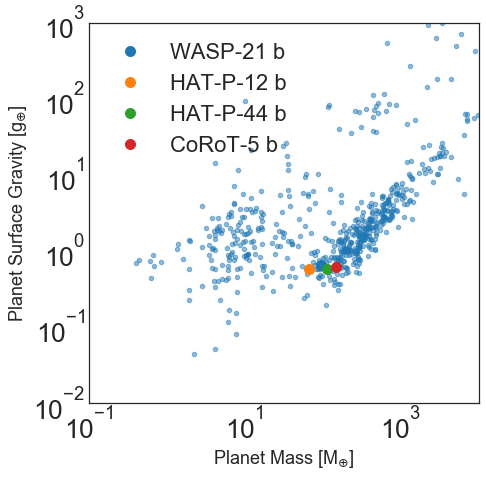

In [43]:
from astropy import constants as const

pl.style.use('seaborn-white')

#see Sing+2016
#WASP-17,HAT-P-1,HD209458,WASP-39,WASP-31,WASP-19,WASP-12,HD189733,WASP-6

HJ_planets='WASP-21,HAT-P-12,HAT-P-44,CoRoT-5'.split(',')
plot_targets = True

M_J = const.M_jup #kg
R_J = const.R_jup #m
M_E = const.M_earth
R_E = const.R_earth
G=6.67408e-11 #m3 kg-1 s-2
g_E = G*M_E/R_E**2

fig,ax=pl.subplots(1,1,figsize=(7,7))
#convert to kg and m and then to Earth units
#GM/R**2
df['pl_bmass']=df['pl_bmassj']*M_J
df['pl_bmassE']=df['pl_bmassj']*M_J/M_E
df['pl_g_E']=G/g_E*(df['pl_bmassj']*M_J)/(df['pl_radj']*R_J)**2 #not pl_logg
df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter',ax=ax,alpha=0.5)#,color='b');

if plot_targets==True:
    for i in HJ_planets:
        try:
            d=df.query('pl_hostname == "{}" and pl_letter == "b"'.format(i))
            d.plot(x='pl_bmassE',y='pl_g_E', marker='o',
                   ms=10,label=i+' b',ax=ax,linestyle='')
        except:
            pass
ax.set_xlabel('Planet Mass [M$_{\oplus}$]',fontsize=fontsize)
ax.set_ylabel('Planet Surface Gravity [g$_{\oplus}$]',fontsize=fontsize)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e3)
ax.set_xlim(1e-1,1e4)

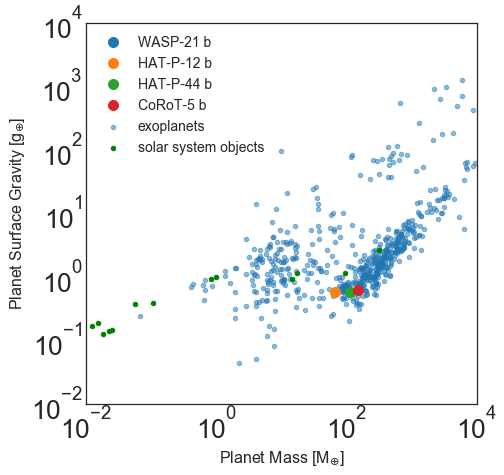

In [65]:
from astropy import constants as const

fontsize=16
pl.style.use('seaborn-white')

#see Sing+2016
#WASP-17,HAT-P-1,HD209458,WASP-39,WASP-31,WASP-19,WASP-12,HD189733,WASP-6

HJ_planets='WASP-21,HAT-P-12,HAT-P-44,CoRoT-5'.split(',')
plot_targets = True

M_J = const.M_jup #kg
R_J = const.R_jup #m
M_E = const.M_earth
R_E = const.R_earth
G=6.67408e-11 #m3 kg-1 s-2
g_E = G*M_E/R_E**2

fig,ax=pl.subplots(1,1,figsize=(7,7))
#convert to kg and m and then to Earth units
#GM/R**2
df['pl_bmass']=df['pl_bmassj']*M_J
df['pl_bmassE']=df['pl_bmassj']*M_J/M_E
df['pl_g_E']=G/g_E*(df['pl_bmassj']*M_J)/(df['pl_radj']*R_J)**2 #not pl_logg
df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter',ax=ax,alpha=0.5,label='exoplanets')#,color='b');

if plot_targets==True:
    for i in HJ_planets:
        try:
            d=df.query('pl_hostname == "{}" and pl_letter == "b"'.format(i))
            d.plot(x='pl_bmassE',y='pl_g_E', marker='o',
                   ms=10,label=i+' b',ax=ax,linestyle='')
        except:
            pass
        
names='Jupiter,Saturn,Uranus,Neptune,Earth,Venus,Mars,Ganymede,Titan,Mercury,Callisto,Io,Moon,Europa,Triton,Pluto,Eris,Titania,Rhea,Oberon,Iapetus,Haumea,Charon,Umbriel,Ariel,Dione,Quaoar,Tethys,Ceres'.split(',')
#km
radii=[69911, 58232, 25362, 24622, 6371, 6051.8, 3389.5, 2634.1, 2576, 2439.7, 2410.3, 1821.6, 1737.1, 1560.8, 1353.4, 1186, 1163, 788.4, 763.8, 761.4, 734.5, 620, 606, 584.7, 578.9, 561.4, 555, 531.1, 473]
# x 1e21 kg
masses=[1898600, 568460, 86832, 102430, 5973.6, 4868.5, 641.85, 148.2, 134.5, 330.2, 107.6, 89.3, 73.5, 48, 21.5, 13.105, 16.7, 3.526, 2.3166, 3.014, 1.9739, 4.006, 1.52, 1.2, 1.35, 1.096, 1.4, 0.6173, 0.939]

df_ss=pd.DataFrame({'name': names, 'mass': masses, 'radius': radii})
df_ss['massE']=df_ss['mass']*1e21/M_E
df_ss['g_E']=G/g_E*df_ss['mass']*1e21/(df_ss['radius']*1e3)**2

df_ss.plot(x='massE',y='g_E', kind='scatter', loglog=True, 
           color='g', ax=ax, label='solar system objects')

ax.set_xlabel('Planet Mass [M$_{\oplus}$]',fontsize=fontsize)
ax.set_ylabel('Planet Surface Gravity [g$_{\oplus}$]',fontsize=fontsize)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e4)
ax.set_xlim(1e-2,1e4)
ax.legend(fontsize=14)